# Capstone Project - Graziella Buitron

### For my Capstone project, I made a convolutional neural network to classify the fruit or vegetable present in an image. This model was created with the intent of solving a problem of the visually impaired in identifying produce.

### Block 1
Importing packages and libraries needed for project

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from keras.layers import Dropout
from keras.layers import BatchNormalization

### Block 2 

Creating variables to define the directories of where to find the image input data for training, testing, and validation. For this project, I am using a dataset of images of fruits and vegetables that I obtained from Kaggle and downloaded them to my personal device. 

In [5]:
train_dir = "./FruitAndVegImages/train/"
test_dir = "./FruitAndVegImages/test/"
val_dir = "./FruitAndVegImages/validation/"

### Block 3

While completing my project for Competency 3, I learned about generators that can be used in Keras. They work to load image and label data in batches as it is needed rather than loading it all at once. This method is much more memory efficient so I decided to use the generators once again for this project. 

The ImageDataGenerator objects normalize the image pixel values for the image sets for validation, testing, and training. 
The third ImageDataGenerator additionally pre-proccesses the training data by rescaling, rotating, shifting, and zooming the images during training. This is done for the model to better generalize to new data by having it be exposed to variations in the image orientation during the training process.

The flow_from_directory function is used to make the batches of pre-proccessed image data for training, testing, and validation. 

I also made a label_map to have the categories of the fruit and vegetable names encoded by unique numerical indexes for better use by the model.

In [9]:
# normalizing the validation and test image pixel values
validation_datagen = ImageDataGenerator(
    rescale=1./255)
test_datagen = ImageDataGenerator(
    rescale=1./255)

# pre-processing of training data by mixing and rotating the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# generate batches of image data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical')


# encoding the vegetable names into numerical labels for the model
label_map = {
    'apple': 0,
    'banana': 1,
    'beetroot': 2,
    'bell_pepper': 3,
    'cabbage': 4,
    'capsicum': 5,
    'carrot': 6,
    'cauliflower': 7,
    'chilli_pepper': 8,
    'corn': 9,
    'cucumber': 10,
    'eggplant': 11,
    'garlic': 12,
    'ginger': 13,
    'grapes': 14,
    'jalepeno': 15,
    'kiwi': 16,
    'lemon': 17,
    'lettuce': 18,
    'mango': 19,
    'onion': 20,
    'orange': 21,
    'paprika': 22,
    'pear': 23,
    'peas': 24,
    'pineapple': 25,
    'pomegranate': 26,
    'potato': 27,
    'raddish': 28,
    'soybeans': 29,
    'spinach': 30,
    'sweetcorn': 31,
    'sweetpotato': 32,
    'tomato': 33,
    'turnip': 34,
    'watermelon': 35
}

# this line maps the numerical class (category) indices to the categorical labels in label_map
train_generator.class_indices = label_map

# generate batches of image data for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=list(label_map.keys())
)

# generate batches of image data for validation
val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=list(label_map.keys())
)

Found 3115 images belonging to 36 classes.
Found 349 images belonging to 36 classes.
Found 341 images belonging to 36 classes.


### Block 4

Here, the architecture of the CNN is built, and the model is compiled. The variable 'history' will store the model's training history. To make the architecture of the model, I used different combinations of convolutional layers, max pooling layers, batch normalization layers, dropout layers, flatten layers, and dense fully connected layers.  It yielded a validation loss of 2.565, and validation accuracy of 23.46%. 

In [10]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    Dropout(0.25),
    MaxPooling2D((2, 2)),
    Conv2D(24, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2, 2)),
    Conv2D(68, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(248, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=14,  
    epochs=30, 
    verbose=1,
    validation_data=val_generator,
    validation_steps=10)

evaluation_res = model.evaluate(val_generator)

print("Validation Loss and Accuracy:", evaluation_res)

Epoch 1/30
14/14 [==============================] - 19s 1s/step - loss: 3.6040 - accuracy: 0.0134 - val_loss: 3.5831 - val_accuracy: 0.0281
Epoch 2/30
14/14 [==============================] - 17s 1s/step - loss: 3.5820 - accuracy: 0.0304 - val_loss: 3.5830 - val_accuracy: 0.0250
Epoch 3/30
14/14 [==============================] - 16s 1s/step - loss: 3.5808 - accuracy: 0.0515 - val_loss: 3.5821 - val_accuracy: 0.0312
Epoch 4/30
14/14 [==============================] - 19s 1s/step - loss: 3.5813 - accuracy: 0.0335 - val_loss: 3.5725 - val_accuracy: 0.0219
Epoch 5/30
14/14 [==============================] - 18s 1s/step - loss: 3.5483 - accuracy: 0.0335 - val_loss: 3.5123 - val_accuracy: 0.0312
Epoch 6/30
14/14 [==============================] - 18s 1s/step - loss: 3.4632 - accuracy: 0.0424 - val_loss: 3.4585 - val_accuracy: 0.0594
Epoch 7/30
14/14 [==============================] - 17s 1s/step - loss: 3.4634 - accuracy: 0.0781 - val_loss: 3.4866 - val_accuracy: 0.0719
Epoch 8/30
14/14 [==

### Block 5

This block is like the previous block, but with some slight changes made to the model’s architecture. I also added additional metrics to pre-process the images for the validation data generator, test data generator, and validation data generator. It yielded slightly better results with a validation loss of 2.127, and validation accuracy of 40.46%.  

In [14]:
# normalizing the validation and test image pixel values
validation_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

# pre-processing of training data by mixing and rotating the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# generate batches of image data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical')


# this line maps the numerical class (category) indices to the categorical labels in label_map
train_generator.class_indices = label_map

# generate batches of image data for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=list(label_map.keys())
)

# generate batches of image data for validation
val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=list(label_map.keys())
)

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(36, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(
    train_generator,
    steps_per_epoch=14,  
    epochs=30, 
    verbose=1,
    validation_data=val_generator,
    validation_steps=10)

evaluation_res2 = model.evaluate(val_generator)

print("Validation Loss and Accuracy:", evaluation_res2)

Found 3115 images belonging to 36 classes.
Found 349 images belonging to 36 classes.
Found 341 images belonging to 36 classes.
Epoch 1/30
14/14 [==============================] - 21s 2s/step - loss: 2.2111 - accuracy: 0.3571 - val_loss: 2.1990 - val_accuracy: 0.3562
Epoch 2/30
14/14 [==============================] - 16s 1s/step - loss: 2.1202 - accuracy: 0.3527 - val_loss: 2.1631 - val_accuracy: 0.3750
Epoch 3/30
14/14 [==============================] - 18s 1s/step - loss: 2.0944 - accuracy: 0.3571 - val_loss: 2.1700 - val_accuracy: 0.3781
Epoch 4/30
14/14 [==============================] - 18s 1s/step - loss: 2.3044 - accuracy: 0.2927 - val_loss: 2.1922 - val_accuracy: 0.3875
Epoch 5/30
14/14 [==============================] - 16s 1s/step - loss: 2.0557 - accuracy: 0.3728 - val_loss: 2.3154 - val_accuracy: 0.3219
Epoch 6/30
14/14 [==============================] - 18s 1s/step - loss: 2.2673 - accuracy: 0.3348 - val_loss: 2.2976 - val_accuracy: 0.3344
Epoch 7/30
14/14 [===============

### Block 6

In the following block of code, I continued to use the updated ImageDataGenerators. I also added batch normalization layers after each convolutional layer followed by a dropout layer. This gave slightly better results with a validation loss of 1.912 and a validation accuracy of 48.68%.

In [15]:
# normalizing the validation and test image pixel values
validation_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

# pre-processing of training data by mixing and rotating the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# generate batches of image data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical')


# this line maps the numerical class (category) indices to the categorical labels in label_map
train_generator.class_indices = label_map

# generate batches of image data for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=list(label_map.keys())
)

# generate batches of image data for validation
val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=list(label_map.keys())
)

model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(36, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(
    train_generator,
    steps_per_epoch=14,  
    epochs=50, 
    verbose=1,
    validation_data=val_generator,
    validation_steps=10)

evaluation_res3 = model.evaluate(val_generator)

print("Validation Loss and Accuracy:", evaluation_res3)

Found 3115 images belonging to 36 classes.
Found 349 images belonging to 36 classes.
Found 341 images belonging to 36 classes.
Epoch 1/50
14/14 [==============================] - 20s 1s/step - loss: 1.9199 - accuracy: 0.4085 - val_loss: 2.0769 - val_accuracy: 0.3844
Epoch 2/50
14/14 [==============================] - 19s 1s/step - loss: 2.0606 - accuracy: 0.3817 - val_loss: 2.0131 - val_accuracy: 0.4062
Epoch 3/50
14/14 [==============================] - 18s 1s/step - loss: 2.1020 - accuracy: 0.3466 - val_loss: 1.9964 - val_accuracy: 0.4219
Epoch 4/50
14/14 [==============================] - 17s 1s/step - loss: 2.0481 - accuracy: 0.3705 - val_loss: 2.1809 - val_accuracy: 0.3250
Epoch 5/50
14/14 [==============================] - 17s 1s/step - loss: 2.1346 - accuracy: 0.3304 - val_loss: 2.1082 - val_accuracy: 0.3656
Epoch 6/50
14/14 [==============================] - 17s 1s/step - loss: 2.0195 - accuracy: 0.4098 - val_loss: 2.0516 - val_accuracy: 0.4281
Epoch 7/50
14/14 [===============

### Block 7

This block is similar to the previous block’s version of the model but with updated batch size, and number of validations steps. For this run, I changed the batch size from 36 to 16 and changed the validation steps from 10 to 15. The changes in batch size changes how many images the model processes at once during training. This smaller size could make the model weights update more frequently or induce higher variance in gradients. The smaller number of validation steps allows for faster training epochs. This results in a validation loss of 1.833 and a validation accuracy of 47.5%.

In [16]:
# normalizing the validation and test image pixel values
validation_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

# pre-processing of training data by mixing and rotating the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# generate batches of image data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  
    batch_size=16,  # changed batch size from 32 to 16
    class_mode='categorical')


# this line maps the numerical class (category) indices to the categorical labels in label_map
train_generator.class_indices = label_map

# generate batches of image data for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,  # changed batch size from 32 to 16
    class_mode='categorical',
    classes=list(label_map.keys())
)

# generate batches of image data for validation
val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=16,  # changed batch size from 32 to 16
    class_mode='categorical',
    classes=list(label_map.keys())
)

model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(36, activation='softmax')
])

model4.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

history4 = model.fit(
    train_generator,
    steps_per_epoch=14,  
    epochs=50, 
    verbose=1,
    validation_data=val_generator,
    validation_steps=15)

evaluation_res4 = model.evaluate(val_generator)

print("Validation Loss and Accuracy:", evaluation_res4)

Found 3115 images belonging to 36 classes.
Found 349 images belonging to 36 classes.
Found 341 images belonging to 36 classes.
Epoch 1/50
14/14 [==============================] - 12s 877ms/step - loss: 1.9788 - accuracy: 0.4196 - val_loss: 1.9587 - val_accuracy: 0.3958
Epoch 2/50
14/14 [==============================] - 10s 769ms/step - loss: 2.0059 - accuracy: 0.3795 - val_loss: 2.1290 - val_accuracy: 0.3375
Epoch 3/50
14/14 [==============================] - 11s 844ms/step - loss: 2.1648 - accuracy: 0.3795 - val_loss: 2.3206 - val_accuracy: 0.2708
Epoch 4/50
14/14 [==============================] - 11s 822ms/step - loss: 2.0831 - accuracy: 0.3795 - val_loss: 2.1413 - val_accuracy: 0.3708
Epoch 5/50
14/14 [==============================] - 10s 768ms/step - loss: 2.0125 - accuracy: 0.4062 - val_loss: 2.1214 - val_accuracy: 0.3542
Epoch 6/50
14/14 [==============================] - 11s 823ms/step - loss: 2.3866 - accuracy: 0.3125 - val_loss: 2.2330 - val_accuracy: 0.3458
Epoch 7/50
14/1

### Block 8

This block is also like the previous block but with changes made to the architecture of the model. Here, I added an additional dense layer with 256 units and a ReLU activation function after the other convolutional layers like before. I also changed the validation steps from 15 to 14. This results in a validation loss of 1.796 and a validation accuracy of 48.68%. These were the best results I was able to obtain.

In [17]:
# normalizing the validation and test image pixel values
validation_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

# pre-processing of training data by mixing and rotating the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# generate batches of image data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  
    batch_size=16,  # changed batch size from 32 to 16
    class_mode='categorical')


# this line maps the numerical class (category) indices to the categorical labels in label_map
train_generator.class_indices = label_map

# generate batches of image data for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,  # changed batch size from 32 to 16
    class_mode='categorical',
    classes=list(label_map.keys())
)

# generate batches of image data for validation
val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=16,  # changed batch size from 32 to 16
    class_mode='categorical',
    classes=list(label_map.keys())
)

model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25), # added dropout layer 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'), # added additional dense layer
    Dense(36, activation='softmax')
])

model5.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

history5 = model.fit(
    train_generator,
    steps_per_epoch=14,  
    epochs=50, 
    verbose=1,
    validation_data=val_generator,
    validation_steps=14) #changed to 14 vs 15 previously

evaluation_res5 = model.evaluate(val_generator)

print("Validation Loss and Accuracy:", evaluation_res5)

Found 3115 images belonging to 36 classes.
Found 349 images belonging to 36 classes.
Found 341 images belonging to 36 classes.
Epoch 1/50
14/14 [==============================] - 11s 804ms/step - loss: 2.0028 - accuracy: 0.3661 - val_loss: 1.8903 - val_accuracy: 0.4732
Epoch 2/50
14/14 [==============================] - 11s 844ms/step - loss: 1.9162 - accuracy: 0.3750 - val_loss: 2.0586 - val_accuracy: 0.3571
Epoch 3/50
14/14 [==============================] - 11s 793ms/step - loss: 1.8225 - accuracy: 0.4330 - val_loss: 1.9138 - val_accuracy: 0.4062
Epoch 4/50
14/14 [==============================] - 11s 831ms/step - loss: 1.8747 - accuracy: 0.4286 - val_loss: 1.9698 - val_accuracy: 0.4152
Epoch 5/50
14/14 [==============================] - 11s 803ms/step - loss: 2.0399 - accuracy: 0.3973 - val_loss: 2.0309 - val_accuracy: 0.4152
Epoch 6/50
14/14 [==============================] - 11s 853ms/step - loss: 1.9672 - accuracy: 0.3839 - val_loss: 1.9827 - val_accuracy: 0.4152
Epoch 7/50
14/1

### Block 9

This block makes a visualization of the model’s performance on the training and validation data as the training progresses through different epochs. The visualization indicates signs of overfitting, high variance, an overly complex model, or possibly a non-optimal learning rate. 

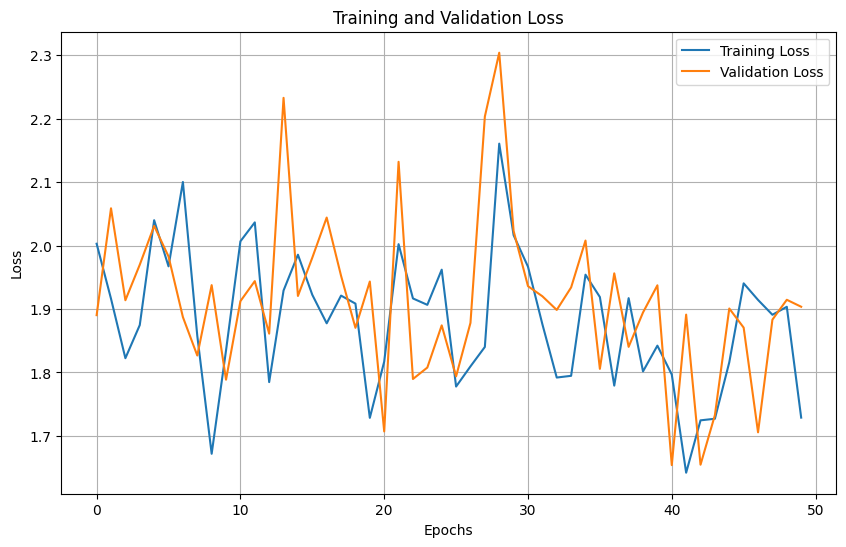

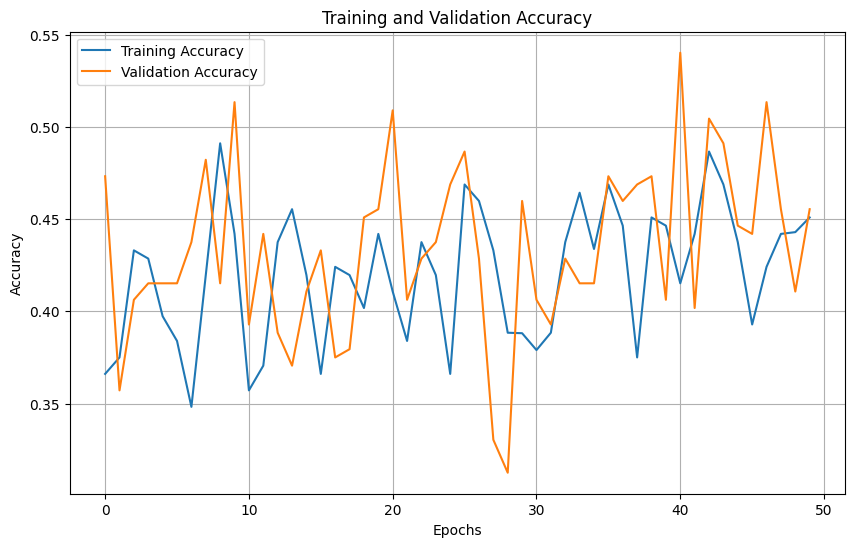

In [18]:
# Extract training and validation loss/accuracy from history
train_loss = history5.history['loss']
val_loss = history5.history['val_loss']
train_acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']

# Plot training and validation loss/accuracy
epochs = range(len(train_loss))  # Get number of epochs

plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(epochs, train_loss, label='Training Loss')
# Plot validation loss
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Similar plot for accuracy
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Block 10

This block defines a function called visualize_training_images. It displays a grid of images from the training data generator. 

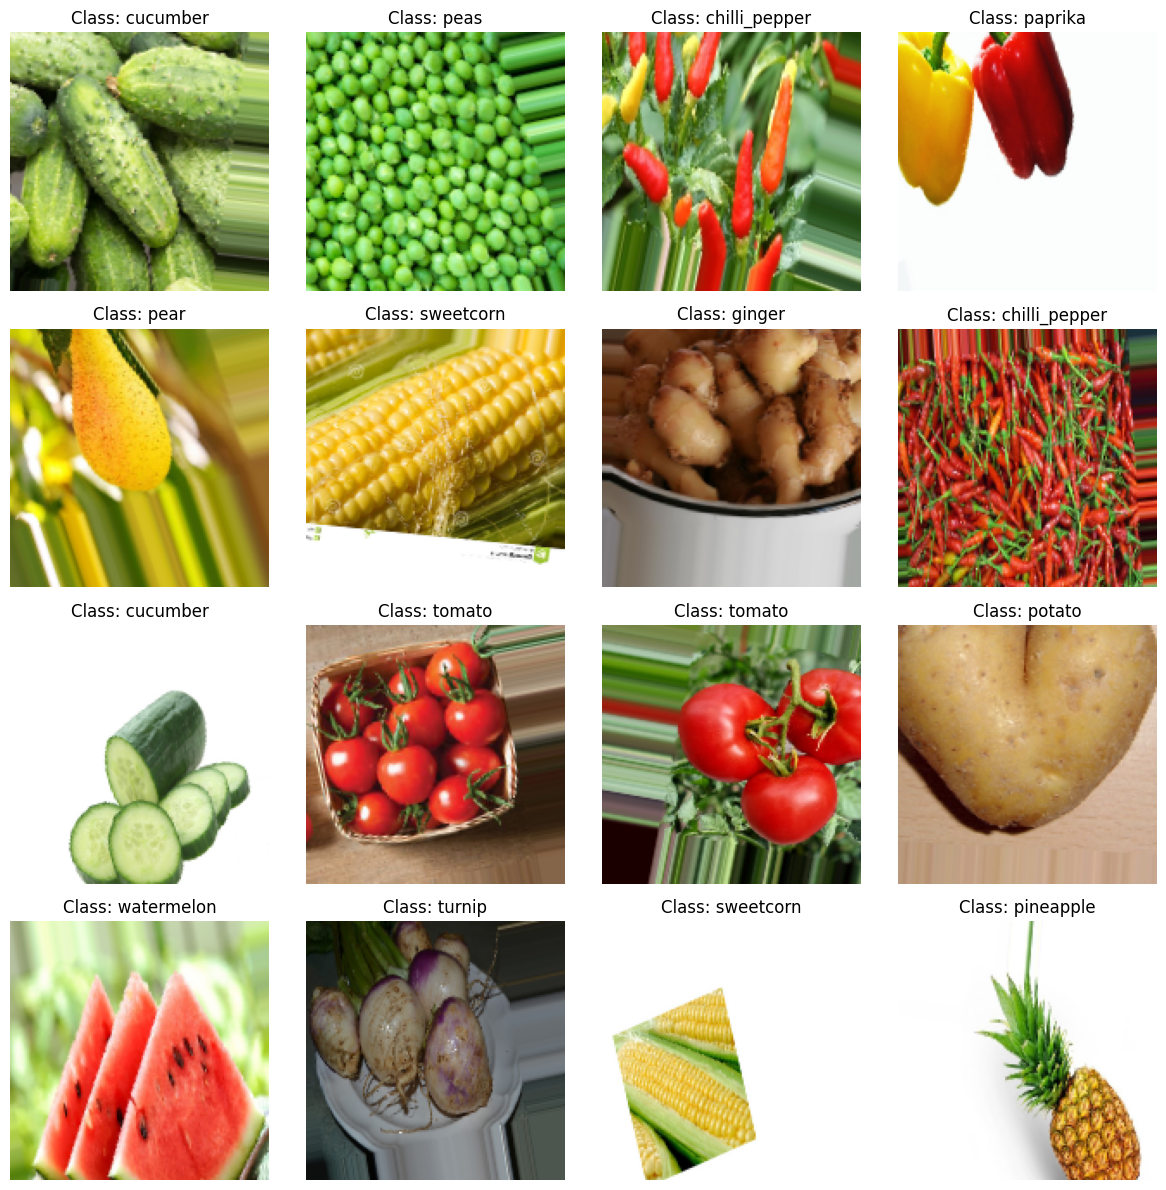

In [19]:
def visualize_training_images(data_generator, num_images=16):
    # Get a batch of images from the training data generator
    X_batch, y_batch = next(data_generator)

    # Adjust the number of rows and columns based on the number of images
    rows = int(np.ceil(num_images / 4))  # Calculate rows (assuming 4 images per row)
    cols = min(4, num_images)  # Ensure no more than 4 columns

    # Prepare a figure for plotting with a smaller size
    plt.figure(figsize=(cols * 3, rows * 3))  # Adjust figure size based on rows and columns

    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)  # Create a grid of subplots
        plt.imshow(X_batch[i])  # Display the image
        plt.title(f"Class: {list(data_generator.class_indices.keys())[y_batch[i].argmax()]}")  # Get class label
        plt.axis('off')  # Hide axis labels and ticks
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Visualize some training images (call before training)
visualize_training_images(train_generator, num_images=16)

### Block 11

This piece of code defines a function called predictor_by_image. It predicts the type of fruit or vegetable presented in the image with the pre-trained model. The function is then called with several random test images to show what the model predicts the image to contain. 

1/1 [==============================] - 0s 16ms/step
The predicted fruit or vegetable is: cabbage


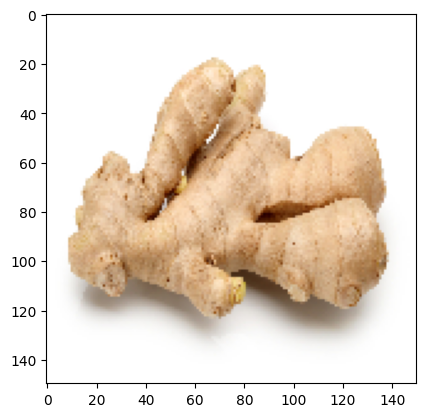

1/1 [==============================] - 0s 13ms/step
The predicted fruit or vegetable is: cabbage


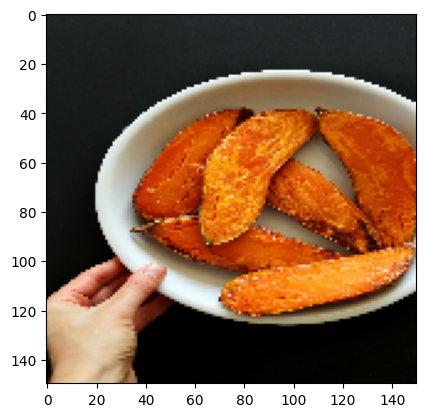

1/1 [==============================] - 0s 21ms/step
The predicted fruit or vegetable is: cabbage


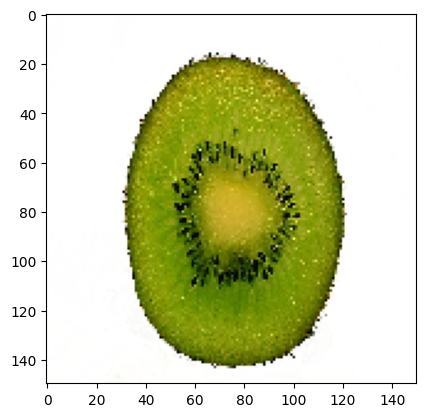

1/1 [==============================] - 0s 17ms/step
The predicted fruit or vegetable is: cabbage


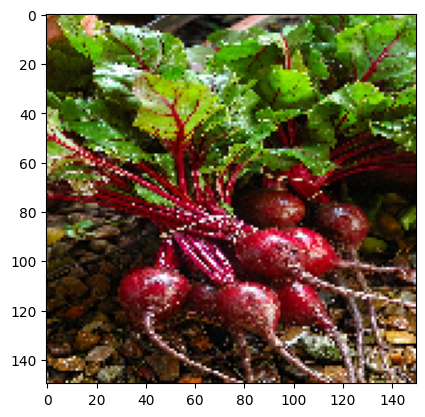

1/1 [==============================] - 0s 15ms/step
The predicted fruit or vegetable is: cabbage


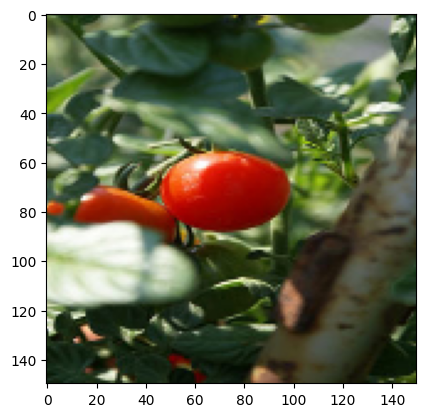

In [21]:
# defining the predictor_by_image function
def predictor_by_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    labels = ["apple", "banana", "beetroot", "bell_pepper", "cabbage", "capsicum", "carrot", "cauliflower", "chilli_pepper", "corn", "cucumber", "eggplant", "garlic", "ginger", "grapes", "jalepeno", "kiwi", "lemon", "lettuce", "mango", "onion", "orange", "paprika", "pear", "peas", "pineapple", "pomegranate", "potato", "raddish", "soybeans", "spinach", "sweetcorn", "sweetpotato", "tomato", "turnip", "watermelon"]
    
    predicted_class_index = np.argmax(prediction)
    
    print(f"The predicted fruit or vegetable is: {labels[predicted_class_index]}")
    
    plt.imshow(img)
    plt.show()

# calling the predictions for 5 random images from the training dataset
predictor_by_image('./FruitAndVegImages/test/ginger/Image_3.jpg', model5)
predictor_by_image('./FruitAndVegImages/test/sweetpotato/Image_5.jpg', model5)
predictor_by_image('./FruitAndVegImages/test/kiwi/Image_6.jpg', model5)
predictor_by_image('./FruitAndVegImages/test/beetroot/Image_2.jpg', model5)
predictor_by_image('./FruitAndVegImages/test/tomato/Image_9.jpg', model5)
